In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.stats as st
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(14,8)})

In [3]:
data = pd.read_csv('posterior_gdpInfantMortality.csv')

In [4]:
data.dropna(inplace=True)
data.rename(columns={'infant.mortality':'im'}, inplace=True)

In [5]:
data.head()

,Unnamed: 0,im,gdp
0,Afghanistan,154.0,2848.0
1,Albania,32.0,863.0
2,Algeria,44.0,1531.0
5,Angola,124.0,355.0
6,Antigua,24.0,6966.0


In [6]:
linreg2=LinearRegression()
X2=pd.DataFrame(np.log(data.gpriordp))
y2=np.log(data.im)
linreg2.fit(X2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
linreg2.score(X2,y2)

0.6556417238359503

In [8]:
endpoints2=np.array([min(X2.gdp),max(X2.gdp)]).reshape(-1,1)
preds2=linreg2.predict(endpoints2)

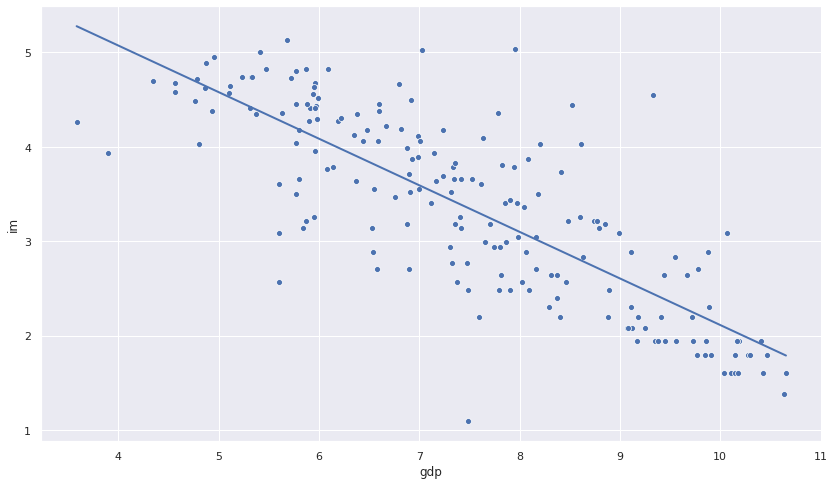

In [9]:
sns.scatterplot(x=np.log(data.gdp), y=np.log(data.im));
plt.plot(endpoints2,preds2, linewidth=2);

In [33]:
# standard error for slope
slope=linreg2.coef_
inter=linreg2.intercept_
df=len(y2)-2
var=np.var(X2.gdp)
sse=sum(((linreg2.predict(X2)-y2)**2))
sumxsq=sum(X2.gdp**2)
se_slope=((1/df)*sse/var)**.5
se_inter=se_slope*(sumxsq/(df+2))**.5

In [19]:
# x+- t*s/root(n)
tval=st.t.ppf(.1, df)

-1.2859996326516983

In [34]:
slope_conf=(slope+tval*se_slope, slope-tval*se_slope)
inter_conf=(inter+tval*se_inter, inter-tval*se_inter)

In [36]:
slope_conf, inter_conf

((array([-0.95526452]), array([-0.03114072])),
 (3.4875147485536497, 10.60288685014868))

In [39]:
se_slope

0.3593017352253444

In [40]:
se_inter

2.7664751687849694

0.35930173522534437

2.7316932604423645